# Entrega Final
## Grupo 14
#### TODO nombres

#### Análisis de la web

Extraremos los datos de Yahoo Finance, un portal web que ofrece información financiera:
    
    https://es.finance.yahoo.com
    
Concretamente, nos interesa la información de la empresa Grifols S.A., que podemos encontrar en:

    https://es.finance.yahoo.com/quote/GRF.MC?p=GRF.MC
    
A parte de la página principal, que nos muestra el resumen, existen más páginas con diferente información:
- Gráfico: https://es.finance.yahoo.com/quote/GRF.MC/chart?p=GRF.MC
- Conversaciones: https://es.finance.yahoo.com/quote/GRF.MC/community?p=GRF.MC
- Estadísticas: https://es.finance.yahoo.com/quote/GRF.MC/key-statistics?p=GRF.MC
- Datos históricos: https://es.finance.yahoo.com/quote/GRF.MC/history?p=GRF.MC
- Perfil: https://es.finance.yahoo.com/quote/GRF.MC/profile?p=GRF.MC
- Financieros: https://es.finance.yahoo.com/quote/GRF.MC/financials?p=GRF.MC
- Análisis: https://es.finance.yahoo.com/quote/GRF.MC/analysis?p=GRF.MC
- Opciones: https://es.finance.yahoo.com/quote/GRF.MC/options?p=GRF.MC
- Accionistas: https://es.finance.yahoo.com/quote/GRF.MC/holders?p=GRF.MC
- Sostenibilidad: https://es.finance.yahoo.com/quote/GRF.MC/sustainability?p=GRF.MC
    
Por lo tanto, podemos extraer la siguiente jerarquia de URL. Partimos de la web principal (https://es.finance.yahoo.com), para obtener la información de una empresa, añadiremos "/quote/&lt;TICKER&gt;?p=&lt;TICKER&gt;", siendo &lt;TICKER&gt; el código bursátil, o ticker, que permite identificar las acciones de una determinada empresa. Para movernos por las diferentes pestañas, añadiremos a la web principal "/quote/&lt;TICKER&gt;/&lt;ID_PAG>?p=&lt;TICKER&gt;". 

Los identificadores de página (&lt;ID_PAG&gt;) son los siguientes:
- Conversaciones: community
- Estadísticas: key-statistics
- Datos históricos: history
- Perfil: profile
- Financieros: financials
- Análisis: analysis
- Opciones: options
- Accionistas: holders
- Sostenibilidad: sustainability

Para obtener datos de Yahoo Finance podemos utilizar la librería yfinance. 

In [1]:
import yfinance
import pandas as pd

In [2]:
# Obtenemos el ticker de Grifols S.A.
grifols_ticker = yfinance.Ticker("GRF.MC")

# Obtenemos los datos históricos de los últimos 5 años
history = grifols_ticker.history(period = "5y")

print("El dataset tiene {} filas.".format(history.shape[0]))
history.head()

El dataset tiene 1278 filas.


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-02-11,17.266479,17.266479,16.755470,16.905491,1488238,0.0,0
2016-02-12,16.928927,17.008625,16.736713,16.877357,1200536,0.0,0
2016-02-15,17.228971,17.594646,17.116454,17.594646,1309863,0.0,0
2016-02-16,17.754042,17.772795,17.393054,17.444624,963142,0.0,0
2016-02-17,17.496197,17.950949,17.468067,17.950949,992893,0.0,0


In [3]:
history.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-02-05,23.700001,23.959999,23.610001,23.620001,617528,0.0,0
2021-02-08,23.670000,23.840000,23.200001,23.309999,720269,0.0,0
2021-02-09,23.410000,23.590000,23.200001,23.350000,611551,0.0,0
2021-02-10,23.410000,23.430000,23.010000,23.040001,837658,0.0,0
2021-02-11,23.049999,23.250000,23.020000,23.070000,100343,0.0,0


De todos modos, supondremos que la librería no existe y realizaremos el scrapping manual de la página web.

Nos interesa obtener los valores diarios de las acciones. Estos datos los encontraremos en la tabla de la pestaña de Datos históricos, por lo que vamos a analizar su código HTML.

La tabla la encontramos dentro de un div con id = "Col1-1-HistoricalDataTable-Proxy", dentro de una section y otro div sin identificador. La tabla tampoco tiene identificador, pero si tiene clase ("W(100%) M(0)") y un atributo llamado "data-test" con valor "historical-prices". Aunque no es necesario porque solo hay una tabla, obtendremos el div "Col1-1-HistoricalDataTable-Proxy", ya que el identificador es único por definición, y buscaremos entre los elementos que lo componen la tabla.

La tabla está compuesta por tres elementos: thead, tbody y tfoot. 

En thead obtendremos el nombre de los atributos de nuestro futuro dataset. Cada valor se encuentra dentro de un span dentro del elemento del tipo &lt;th&gt;.

En tbody obtendremos los valores que formarán nuestro dataset en el mismo orden que en la cabecera. Cada fila (datos de un día) se encuentra en un elemento del tipo &lt;tr&gt; Dentro de cada &lt;tr&gt;, el valor se encuentra dentro de un span dentro de un elemento del tipo &lt;td&gt;.

De tfoot no nos interesa ninguna información.

Para cargar la información de los últimos 5 años hay que pulsar un botón con el atributo "data-value" con valor "5_Y".

#### Web scrapping

In [4]:
# Definimos las constantes de la URL
MAIN_URL = "https://es.finance.yahoo.com"
TICKER = "GRF.MC"

In [5]:
import requests
from bs4 import BeautifulSoup

In [6]:
# Creamos la URL a la página web con los datos históricos y obtenemos el código HTML
url = MAIN_URL + "/quote/" + TICKER + "/history?p=" + TICKER
soup = BeautifulSoup(requests.get(url).content, "html.parser")

In [7]:
# Obtenemos el div con id más cercano a la tabla
div = soup.find(id = "Col1-1-HistoricalDataTable-Proxy")

# Buscamos la tabla entre sus elementos
table = div.find_all("table", class_ = "W(100%) M(0)", attrs = {"data-test": "historical-prices"})[0]
#table = soup.find_all("table")[0] # como es la única tabla, también la podemos obtener directamente

In [8]:
# Separamos la tabla en head y body
table_head = table.find("thead")
table_body = table.find("tbody")

# Buscamos los nombres de las columnas dentro del head de la tabla
columns_names = []

th_elements = table_head.find_all("th")
for th in th_elements:
    columns_names.append(th.find("span").text)
    
print("Columnas: {}".format(columns_names))

# Obtenemos los datos del body
tr_elements = table_body.find_all("tr")

data = []

# Cada tr es una fila de la tabla con los valores de un dia
for tr in tr_elements:
    # Dentro de cada tr, hay elementos td con un span que contiene el valor
    td_elements = tr.find_all("td")
    
    data_row = []
    # El orden de los valores es el mismo que el del head
    for td in td_elements:
        
        # Controlamos los valores vacíos
        span = td.find("span")
        if span != None:
            data_row.append(span.text)
        else:
            data_row.append(None)
    
    # Añadimos la fila a los datos totales
    data.append(data_row)

Columnas: ['Fecha', 'Abrir', 'Máx.', 'Mín.', 'Cierre*', 'Cierre ajus.**', 'Volumen']


In [9]:
# Creamos el dataframe de Pandas con los datos obtenidos
grifols_df = pd.DataFrame(data, columns = columns_names)
print("El dataset tiene {} filas.".format(grifols_df.shape[0]))
grifols_df.head()

El dataset tiene 100 filas.


,Fecha,Abrir,Máx.,Mín.,Cierre*,Cierre ajus.**,Volumen
0,11 feb. 2021,"23,05","23,25","23,02","23,07","23,07",100.343
1,10 feb. 2021,"23,41","23,43","23,01","23,04","23,04",837.658
2,09 feb. 2021,"23,41","23,59","23,20","23,35","23,35",611.551
3,08 feb. 2021,"23,67","23,84","23,20","23,31","23,31",720.269
4,05 feb. 2021,"23,70","23,96","23,61","23,62","23,62",617.528


Nuestro dataset tiene únicamente 100 valores. Esto es porque la página web utiliza "scroll infinito", es decir, en vez de organizar los diferentes registros en páginas, a medida que el usuario va haciendo scroll los va cargando a la tabla de manera dinámica. 

Por lo tanto, el HTML recibido al hacer la petición HTTP únicamente tendrá los primeros 100 valores.

Para poder obtener todos los valores de los últimos 5 años tendremos que modificar la web, ya que ésta tiene un HTML dinámico. Para ello, utilizaremos la librería Splinter.

In [12]:
from splinter import Browser
import time

In [13]:
# Abrimos el navegador y cargamos la URL
browser = Browser("chrome", headless = True)
browser.visit(url)

# Yahoo nos pide aceptar la política de privacidad dado que es un navegador nuevo
# Pulsamos en el botón de scroll down de los términos
browser.find_by_id("scroll-down-btn").click() 

# Aceptamos los términos
browser.find_by_name("agree").click()

# Abrimos el desplegable para seleccionar el límite temporal
browser.find_by_xpath("//*[@id=\"Col1-1-HistoricalDataTable-Proxy\"]/section/div[1]/div[1]/div[1]/div/div/div/span").click()

# Indicamos que queremos ver los datos de los últimos 5 años
browser.find_by_text("5 a").click()

# Aplicamos el filtro
browser.find_by_text("Aplicar").click()

# Hacemos scroll down hasta el final de la página para cargar los datos
for _ in range(20):
    browser.execute_script("window.scrollTo(0, 100000);")
    time.sleep(1)

In [14]:
# Cargamos el HTML con todos los datos
soup = BeautifulSoup(browser.html, "html.parser")

# Obtenemos el div con id más cercano a la tabla
div = soup.find(id = "Col1-1-HistoricalDataTable-Proxy")

# Buscamos la tabla entre sus elementos
table = div.find_all("table", class_ = "W(100%) M(0)", attrs = {"data-test": "historical-prices"})[0]

# Separamos la table en head y body
table_head = table.find("thead")
table_body = table.find("tbody")

# Buscamos los nombres de las columnas dentro del head de la tabla
columns_names = []

th_elements = table_head.find_all("th")
for th in th_elements:
    columns_names.append(th.find("span").text)
    
print("Columnas: {}".format(columns_names))

# Obtenemos los datos del body
tr_elements = table_body.find_all("tr")

data = []

# Cada tr es una fila de la tabla con los valores de un dia
for tr in tr_elements:
    # Dentro de cada tr, hay elementos td con un span que contiene el valor
    td_elements = tr.find_all("td")

    data_row = []
    # El orden de los valores es el mismo que el del head
    for td in td_elements:
        
        # Controlamos los valores vacíos
        span = td.find("span")
        if span != None:
            data_row.append(span.text)
        else:
            data_row.append(None)
    
    # Añadimos la fila a los datos totales
    data.append(data_row)

# Cerramos el navegador
browser.quit()

Columnas: ['Fecha', 'Abrir', 'Máx.', 'Mín.', 'Cierre*', 'Cierre ajus.**', 'Volumen']


In [15]:
# Creamos el dataframe de Pandas con los datos obtenidos
grifols_df = pd.DataFrame(data, columns = columns_names)
print("El dataset tiene {} filas.".format(grifols_df.shape[0]))

# Eliminamos las filas con valores nulos
grifols_df.dropna(inplace = True)
print("El dataset tiene {} filas.".format(grifols_df.shape[0]))

grifols_df.head()

El dataset tiene 1289 filas.
El dataset tiene 1276 filas.


,Fecha,Abrir,Máx.,Mín.,Cierre*,Cierre ajus.**,Volumen
0,10 feb 2021,"23,41","23,43","23,01","23,04","23,04",837.658
1,09 feb 2021,"23,41","23,59","23,20","23,35","23,35",611.551
2,08 feb 2021,"23,67","23,84","23,20","23,31","23,31",720.269
3,05 feb 2021,"23,70","23,96","23,61","23,62","23,62",617.528
4,04 feb 2021,"23,45","23,76","23,42","23,65","23,65",925.993


In [16]:
grifols_df.tail()

,Fecha,Abrir,Máx.,Mín.,Cierre*,Cierre ajus.**,Volumen
1284,17 feb 2016,"18,66","19,15","18,63","19,15","17,95",992.893
1285,16 feb 2016,"18,93","18,95","18,55","18,60","17,44",963.142
1286,15 feb 2016,"18,38","18,76","18,25","18,76","17,59",1.309.863
1287,12 feb 2016,"18,06","18,14","17,85","18,00","16,88",1.200.536
1288,11 feb 2016,"18,42","18,42","17,87","18,03","16,91",1.488.238


#### Transformación de los datos

In [15]:
def transform_date(date):
    splitted_date = date.split(" ")
    
    day = int(splitted_date[0])
    month = 0
    year = int(splitted_date[2])
    
    #Transformamos el mes a su valor numérico correspondiente
    if splitted_date[1] == "ene":
        month = 1
    elif splitted_date[1] == "feb":
        month = 2
    elif splitted_date[1] == "mar":
        month = 3
    elif splitted_date[1] == "abr":
        month = 4
    elif splitted_date[1] == "may":
        month = 5
    elif splitted_date[1] == "jun":
        month = 6
    elif splitted_date[1] == "jul":
        month = 7
    elif splitted_date[1] == "ago":
        month = 8
    elif splitted_date[1] == "sept":
        month = 9
    elif splitted_date[1] == "oct":
        month = 10
    elif splitted_date[1] == "nov":
        month = 11
    elif splitted_date[1] == "dic":
        month = 12
    
    formatted_date = "{:02d}-{:02d}-{:04d}".format(day, month, year)
    return formatted_date

In [16]:
# Transformamos los valores de string a float/int/datatime
grifols_df["Fecha"] = grifols_df["Fecha"].apply(transform_date)
grifols_df["Fecha"] = pd.to_datetime(grifols_df["Fecha"], format = "%d-%m-%Y")
grifols_df["Abrir"] = grifols_df["Abrir"].str.replace(",", ".").astype(float)
grifols_df["Máx."] = grifols_df["Máx."].str.replace(",", ".").astype(float)
grifols_df["Mín."] = grifols_df["Mín."].str.replace(",", ".").astype(float)
grifols_df["Cierre*"] = grifols_df["Cierre*"].str.replace(",", ".").astype(float)
grifols_df["Cierre ajus.**"] = grifols_df["Cierre ajus.**"].str.replace(",", ".").astype(float)
grifols_df["Volumen"] = grifols_df["Volumen"].str.replace(".", "").astype(int)
grifols_df.dtypes

Fecha             datetime64[ns]
Abrir                    float64
Máx.                     float64
Mín.                     float64
Cierre*                  float64
Cierre ajus.**           float64
Volumen                    int32
dtype: object

In [17]:
grifols_df.head()

,Fecha,Abrir,Máx.,Mín.,Cierre*,Cierre ajus.**,Volumen
0,2021-02-09,23.41,23.59,23.20,23.35,23.35,611551
1,2021-02-08,23.67,23.84,23.20,23.31,23.31,720269
2,2021-02-05,23.70,23.96,23.61,23.62,23.62,617528
3,2021-02-04,23.45,23.76,23.42,23.65,23.65,925993
4,2021-02-03,23.63,23.81,23.42,23.42,23.42,1060606


In [18]:
# Guardamos los datos extraidos en un fichero CSV
grifols_df.to_csv("grifols_stock_data.csv", index = False)

#### Modelos

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# Ordenamos al revés el dataset para tener los datos de pasado a presente
r_grifols_df = grifols_df.sort_values(by = "Fecha").reset_index(drop = True)
r_grifols_df.dropna(inplace = True)
r_grifols_df.head()

,Fecha,Abrir,Máx.,Mín.,Cierre*,Cierre ajus.**,Volumen
0,2016-02-10,18.36,18.66,18.18,18.54,17.38,2195671
1,2016-02-11,18.42,18.42,17.87,18.03,16.91,1488238
2,2016-02-12,18.06,18.14,17.85,18.00,16.88,1200536
3,2016-02-15,18.38,18.76,18.25,18.76,17.59,1309863
4,2016-02-16,18.93,18.95,18.55,18.60,17.44,963142


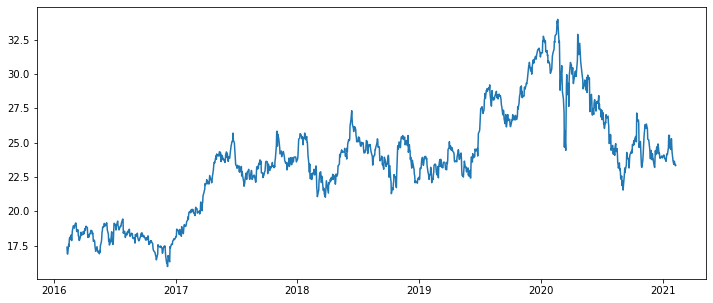

In [21]:
plt.figure(figsize = (12, 5))
plt.plot(r_grifols_df["Fecha"], r_grifols_df["Cierre ajus.**"])
plt.show()

In [22]:
# Añadimos un atributo con la predicción (valor de cierre del día siguiente)
r_grifols_df["Prediccion"] = r_grifols_df["Cierre ajus.**"].shift(-1)
r_grifols_df.tail()

,Fecha,Abrir,Máx.,Mín.,Cierre*,Cierre ajus.**,Volumen,Prediccion
1271,2021-02-03,23.63,23.81,23.42,23.42,23.42,1060606,23.65
1272,2021-02-04,23.45,23.76,23.42,23.65,23.65,925993,23.62
1273,2021-02-05,23.70,23.96,23.61,23.62,23.62,617528,23.31
1274,2021-02-08,23.67,23.84,23.20,23.31,23.31,720269,23.35
1275,2021-02-09,23.41,23.59,23.20,23.35,23.35,611551,NaN


In [23]:
# Eliminamos el último valor porque no tiene predicción
r_grifols_df.dropna(inplace = True)
r_grifols_df.tail()

,Fecha,Abrir,Máx.,Mín.,Cierre*,Cierre ajus.**,Volumen,Prediccion
1270,2021-02-02,23.74,23.99,23.51,23.56,23.56,1201590,23.42
1271,2021-02-03,23.63,23.81,23.42,23.42,23.42,1060606,23.65
1272,2021-02-04,23.45,23.76,23.42,23.65,23.65,925993,23.62
1273,2021-02-05,23.70,23.96,23.61,23.62,23.62,617528,23.31
1274,2021-02-08,23.67,23.84,23.20,23.31,23.31,720269,23.35


In [24]:
# Separamos el dataset en Train y Test
X_stock = np.array(r_grifols_df.drop(["Fecha", "Prediccion"], 1))
Y_stock = np.array(r_grifols_df["Prediccion"])

X_train, X_test, Y_train, Y_test = train_test_split(X_stock, Y_stock, random_state = 1)

In [25]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print("MSE: {}".format(mean_squared_error(Y_test, Y_pred)))
print("R2: {}".format(r2_score(Y_test, Y_pred)))

MSE: 0.14695646968497442
R2: 0.9912726799953024


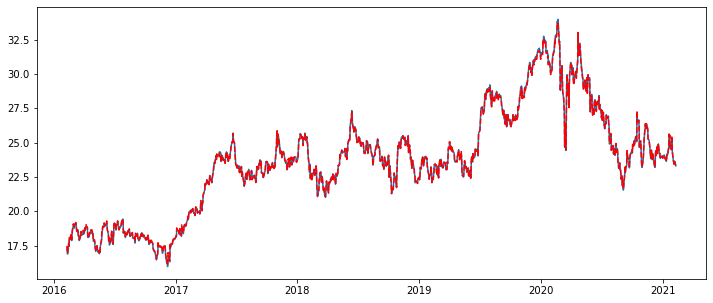

In [26]:
# TEST v0.1
prev = model.predict(X_stock)

plt.figure(figsize = (12, 5))
plt.plot(r_grifols_df["Fecha"], r_grifols_df["Cierre ajus.**"])
plt.plot(r_grifols_df["Fecha"], prev, "r--")
plt.show()